<a href="https://colab.research.google.com/github/shan53815/CS634DataMining/blob/main/DS677005_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'blue'>**Assignment 2**

We have studied the prevalent powerful deep CNNs widely used in computer vision tasks, e.g., image classification, object detection in week 3 and week 4.  These deep CNNs are structured through the alternating application of convolutional layers, nonlinear activation functions, and pooling layers, building deep models that extract hierarchical features from low-level to high-level. Typically, Multilayer Perceptrons (MLPs) are employed towards the end of these networks for classification purposes. Key characteristics of CNNs include weight sharing, translational invariance, and local receptive fields. Additionally, the use of subsampling, or pooling, significantly reduces the number of hyperparameters, offering an advantage over traditional fully connected neural networks.

<font color = 'red'>This assignment cover how to implement a deep convolutional neural neworks with PyTorch. The detailed tasks are listed below.

- Implement a CNN model with ``three convolutional layers (stride = 1, padding = 1), each followed by a ReLU nonlinearity and a max-pooling layer  (stride = 2, kernel = 2). Include *skip connections* between the layers. '' (please try to design your CNN model with fewer parameters without sacrifying too much performance). <font color = 'green'>-- 20pts

- Please output the number of total parameters in your model and the model architecture in details;  <font color = 'green'>-- 10pts

- Traning and test the model on the [CIFAR10 dataset](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html) with only two classes (class labels -- 1 and 2) for saving computing resources; output the final test accuracy for two classes; visualize the trainig and test loss curves over epochs (the total epoch numbers can be determined by the one achieving both good trainig and test performance depending on your designed model.). <font color = 'green'>-- 20pts

- In the above training procedure, please experiment with **different batch sizes, learning rates, and regularization techniques** introduced in our previous lectures for your CNN model. After conducting the experimental result comparisons, please provide a detailed analysis of the findings you observed. <font color = 'green'>-- 50pts

////////////////////////////////////////////////////////////////////////////////////////////////////////////////

----
<b>Main Goal</b>: amiliarize you further with the Jupyter/Colab environment and python pakcages (Numpy, matplotlib, pandas, scikit learn, etc.), and get familiar with designing a deep CNNs for image classification.

<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

##Question 1: implement the CNN model (20pts)

In [1]:
# your code goes here
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional layer (input channels = 3, output channels = 16)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # Max-pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.fc1 = nn.Linear(64 * 4 * 4, 2)  # Assuming input size is 32x32, downsampled to 4x4 by pooling

    def forward(self, x):
        # First layer with ReLU and max-pooling
        x1 = F.relu(self.conv1(x))
        x = self.pool(x1)

        # Second layer with skip connection
        x2 = F.relu(self.conv2(x))
        x = self.pool(x2 + x1)  # Skip connection from conv1

        # Third layer with skip connection
        x3 = F.relu(self.conv3(x))
        x = self.pool(x3 + x2)  # Skip connection from conv2

        # Flatten the output for the fully connected layer
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc1(x)  # Fully connected layer

        return x

# Initialize the model
model = SimpleCNN()
print(model)




SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=2, bias=True)
)


##Question 2: Output the total number of model parameters and model architecture using PyTorch (10pts)



In [2]:
# your answer goes here
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Total parameters: {count_parameters(model)}')









Total parameters: 25634


##Question 3: Train and test the model on the CIFAR10 dataset with only two calsses (labels : 1 and 2). (20 pts)

Please **(1) output the final test accuracy for different classes**; **(2) visualize the trainig and test loss curves over epochs**

(Note that the total epoch numbers can be determined by the one achieving both good trainig and test performance depending on your designed model.).

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Training Loss: 0.3012
Epoch 2, Training Loss: 0.1822
Epoch 3, Training Loss: 0.1610
Epoch 4, Training Loss: 0.1284
Epoch 5, Training Loss: 0.1108
Epoch 6, Training Loss: 0.0999
Epoch 7, Training Loss: 0.0867
Epoch 8, Training Loss: 0.0727
Epoch 9, Training Loss: 0.0690
Epoch 10, Training Loss: 0.0620
Final Test Accuracy: 0.9680
Accuracy for class 1: 0.9540
Accuracy for class 2: 0.9820


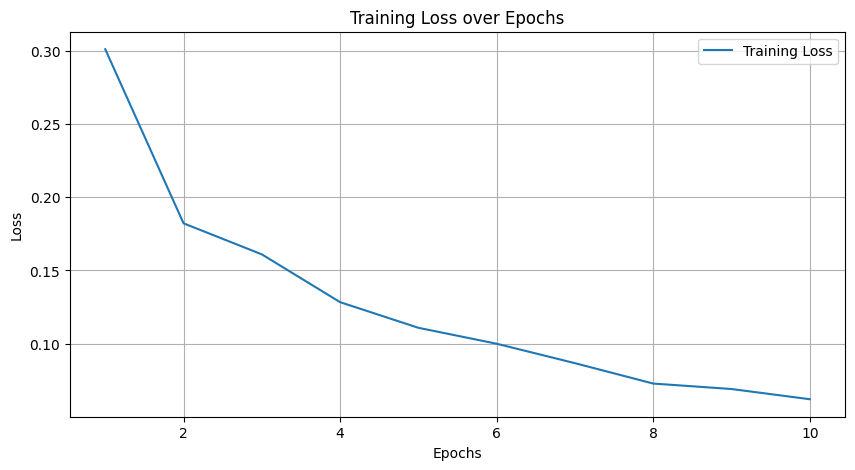

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Input channels: 3, Output channels: 16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # Input channels: 16, Output channels: 32
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Input channels: 32, Output channels: 64
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                  # Pooling layer
        self.fc1 = nn.Linear(64 * 4 * 4, 2)                                # Fully connected layer for outputting two classes

        # 1x1 convolution for adjusting the number of channels in skip connections
        self.conv1x1 = nn.Conv2d(16, 32, kernel_size=1)                   # 1x1 convolution to adjust channel number

    def forward(self, x):
        x1 = nn.functional.relu(self.conv1(x))
        x1_pooled = self.pool(x1)  # Size becomes (batch_size, 16, 16, 16)

        x2 = nn.functional.relu(self.conv2(x1_pooled))
        x2_pooled = self.pool(x2)  # Size becomes (batch_size, 32, 8, 8)

        # Make x1_pooled and x2_pooled have the same number of channels and spatial dimensions
        x1_resized = self.conv1x1(x1_pooled)  # Adjust channels to 32
        x1_resized = nn.functional.adaptive_avg_pool2d(x1_resized, output_size=(8, 8))  # Size becomes (batch_size, 32, 8, 8)

        x = x2_pooled + x1_resized  # Now dimensions match

        x3 = nn.functional.relu(self.conv3(x))
        x = self.pool(x3)  # Size becomes (batch_size, 64, 4, 4)

        # Flatten output for the fully connected layer
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc1(x)

        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset and filter to keep only classes 1 and 2
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def filter_classes(dataset, classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in classes]
    return Subset(dataset, indices)

trainset = filter_classes(trainset, [1, 2])
testset = filter_classes(testset, [1, 2])

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Initialize model, loss function, and optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, trainloader, epochs=10):
    model.train()
    training_losses = []

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Adjust labels to start from 0
            labels = labels - 1  # Class 1 becomes 0, Class 2 becomes 1
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(trainloader)
        training_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}, Training Loss: {epoch_loss:.4f}')

    return training_losses

# Testing function
def test(model, testloader):
    model.eval()
    total_correct = 0
    total_samples = 0
    class_correct = [0] * 2
    class_total = [0] * 2

    with torch.no_grad():
        for inputs, labels in testloader:
            labels = labels - 1  # Adjust labels to start from 0
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

            for i in range(labels.size(0)):
                label = labels[i].item()
                class_correct[label] += (predicted[i] == labels[i]).item()
                class_total[label] += 1

    accuracy = total_correct / total_samples
    class_accuracies = [class_correct[i] / class_total[i] for i in range(2)]
    return accuracy, class_accuracies

# Train and test the model
epochs = 10
training_losses = train(model, trainloader, epochs)
accuracy, class_accuracies = test(model, testloader)

# Output final test accuracy
print(f'Final Test Accuracy: {accuracy:.4f}')
for i in range(2):
    print(f'Accuracy for class {i + 1}: {class_accuracies[i]:.4f}')

# Visualize training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), training_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
















##Question 4: Experiment with different batch size (32, 64), learning rate (0.01, 0.001), regularization methods (L1 and L2) in your networks. The loss function is "cross-entropy" loss. (30 pts)


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Training Loss: 0.2733
Epoch 2, Training Loss: 0.1969
Epoch 3, Training Loss: 0.1701
Epoch 4, Training Loss: 0.1623
Epoch 5, Training Loss: 0.1602
Epoch 6, Training Loss: 0.1312
Epoch 7, Training Loss: 0.1500
Epoch 8, Training Loss: 0.1398
Epoch 9, Training Loss: 0.1436
Epoch 10, Training Loss: 0.1369
Final Test Accuracy (Batch size: 32, LR: 0.01, Weight Decay: 0.0): 0.9435
Accuracy for class 1: 0.9020
Accuracy for class 2: 0.9850


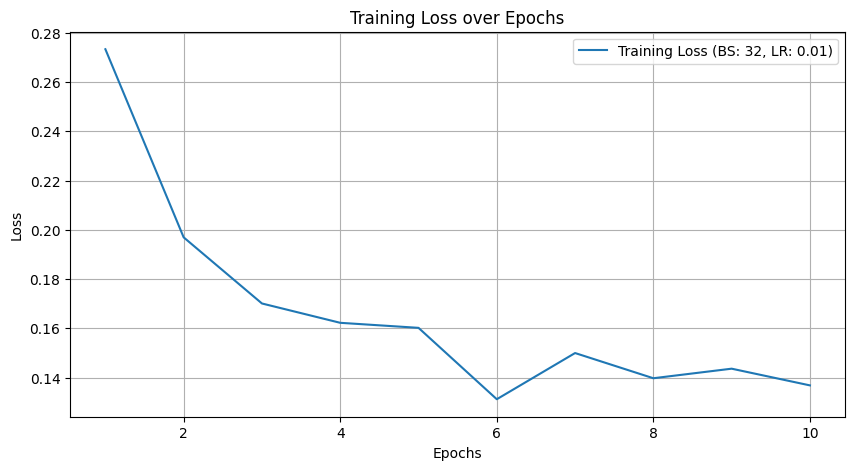

Epoch 1, Training Loss: 0.3387
Epoch 2, Training Loss: 0.1974
Epoch 3, Training Loss: 0.1847
Epoch 4, Training Loss: 0.1696
Epoch 5, Training Loss: 0.1694
Epoch 6, Training Loss: 0.1495
Epoch 7, Training Loss: 0.1959
Epoch 8, Training Loss: 0.1661
Epoch 9, Training Loss: 0.1528
Epoch 10, Training Loss: 0.1437
Final Test Accuracy (Batch size: 32, LR: 0.01, Weight Decay: 0.0001): 0.9435
Accuracy for class 1: 0.9780
Accuracy for class 2: 0.9090


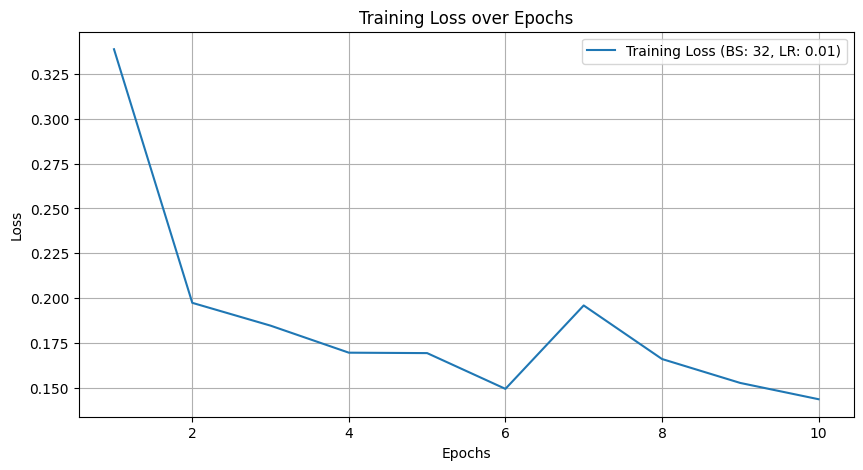

Epoch 1, Training Loss: 0.2675
Epoch 2, Training Loss: 0.1490
Epoch 3, Training Loss: 0.1171
Epoch 4, Training Loss: 0.0941
Epoch 5, Training Loss: 0.0805
Epoch 6, Training Loss: 0.0686
Epoch 7, Training Loss: 0.0555
Epoch 8, Training Loss: 0.0509
Epoch 9, Training Loss: 0.0389
Epoch 10, Training Loss: 0.0305
Final Test Accuracy (Batch size: 32, LR: 0.001, Weight Decay: 0.0): 0.9730
Accuracy for class 1: 0.9770
Accuracy for class 2: 0.9690


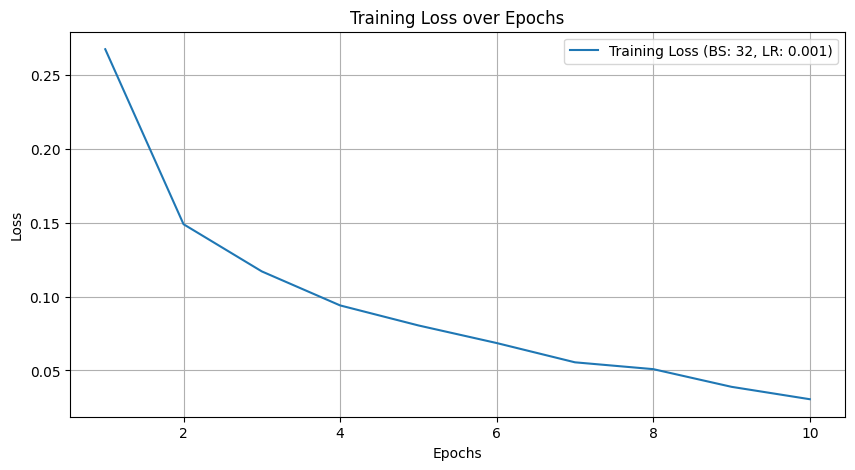

Epoch 1, Training Loss: 0.2607
Epoch 2, Training Loss: 0.1467
Epoch 3, Training Loss: 0.1131
Epoch 4, Training Loss: 0.0916
Epoch 5, Training Loss: 0.0760
Epoch 6, Training Loss: 0.0692
Epoch 7, Training Loss: 0.0548
Epoch 8, Training Loss: 0.0447
Epoch 9, Training Loss: 0.0350
Epoch 10, Training Loss: 0.0285
Final Test Accuracy (Batch size: 32, LR: 0.001, Weight Decay: 0.0001): 0.9680
Accuracy for class 1: 0.9800
Accuracy for class 2: 0.9560


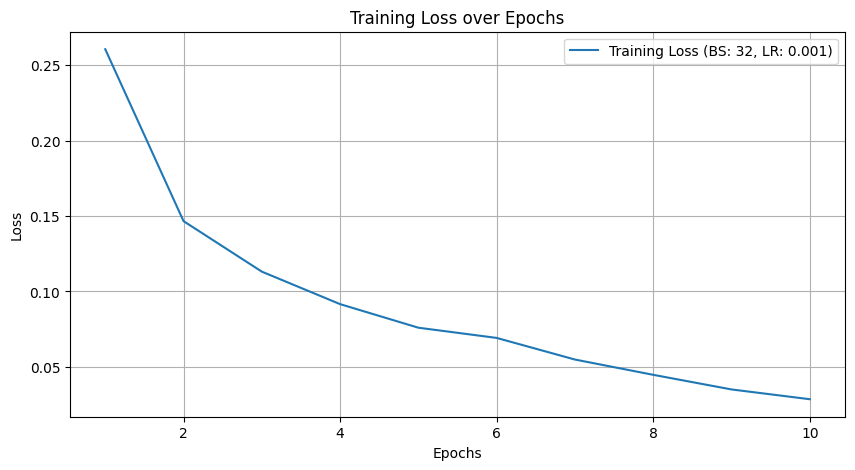

Epoch 1, Training Loss: 0.2993
Epoch 2, Training Loss: 0.1920
Epoch 3, Training Loss: 0.1679
Epoch 4, Training Loss: 0.1395
Epoch 5, Training Loss: 0.1599
Epoch 6, Training Loss: 0.1289
Epoch 7, Training Loss: 0.1111
Epoch 8, Training Loss: 0.1048
Epoch 9, Training Loss: 0.1129
Epoch 10, Training Loss: 0.1002
Final Test Accuracy (Batch size: 64, LR: 0.01, Weight Decay: 0.0): 0.9620
Accuracy for class 1: 0.9670
Accuracy for class 2: 0.9570


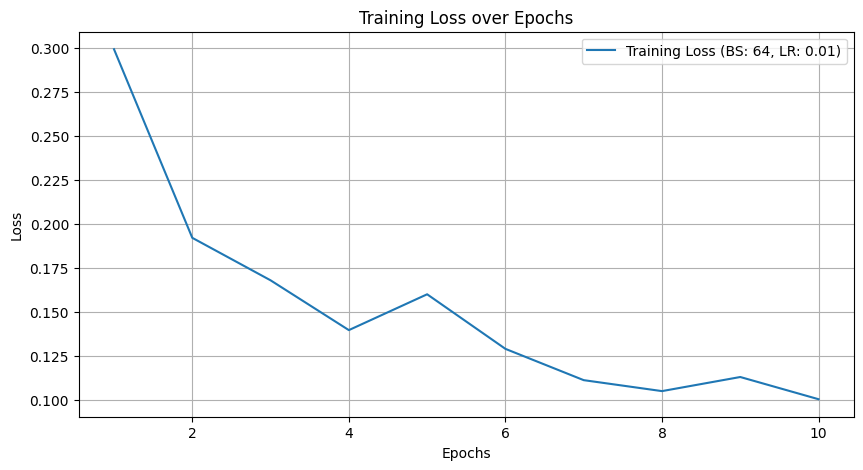

Epoch 1, Training Loss: 0.3197
Epoch 2, Training Loss: 0.1912
Epoch 3, Training Loss: 0.1435
Epoch 4, Training Loss: 0.1314
Epoch 5, Training Loss: 0.1217
Epoch 6, Training Loss: 0.0935
Epoch 7, Training Loss: 0.1075
Epoch 8, Training Loss: 0.0931
Epoch 9, Training Loss: 0.0861
Epoch 10, Training Loss: 0.0859
Final Test Accuracy (Batch size: 64, LR: 0.01, Weight Decay: 0.0001): 0.9615
Accuracy for class 1: 0.9670
Accuracy for class 2: 0.9560


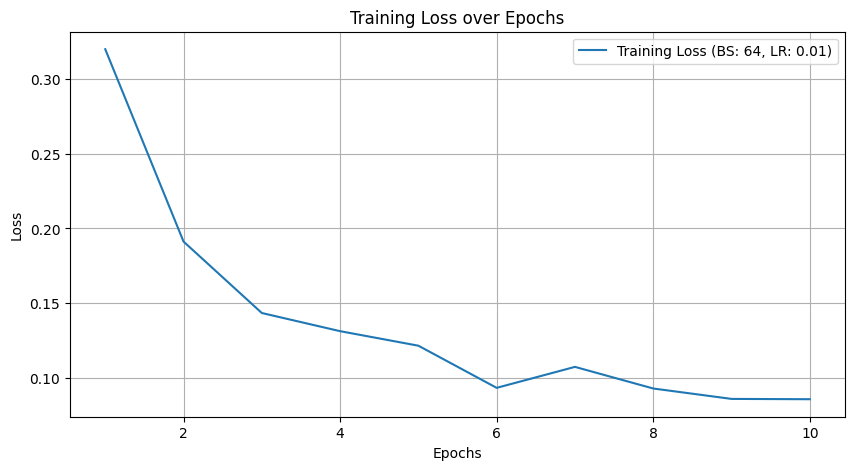

Epoch 1, Training Loss: 0.2996
Epoch 2, Training Loss: 0.1720
Epoch 3, Training Loss: 0.1470
Epoch 4, Training Loss: 0.1191
Epoch 5, Training Loss: 0.1054
Epoch 6, Training Loss: 0.0914
Epoch 7, Training Loss: 0.0769
Epoch 8, Training Loss: 0.0683
Epoch 9, Training Loss: 0.0644
Epoch 10, Training Loss: 0.0501
Final Test Accuracy (Batch size: 64, LR: 0.001, Weight Decay: 0.0): 0.9705
Accuracy for class 1: 0.9740
Accuracy for class 2: 0.9670


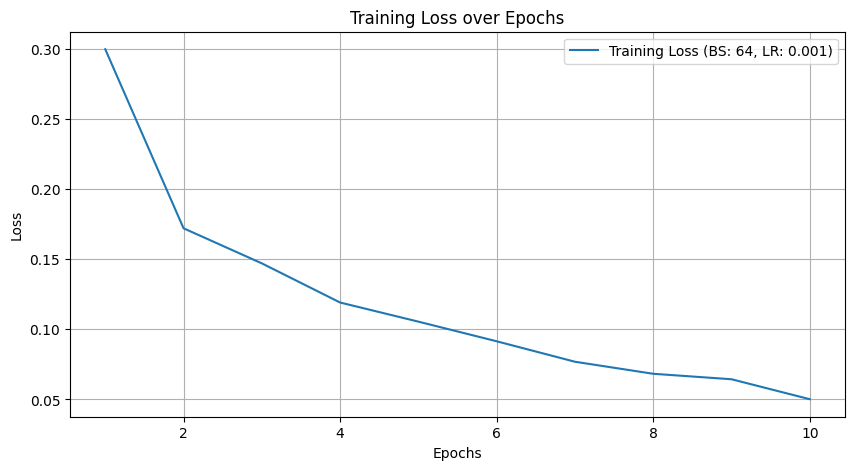

Epoch 1, Training Loss: 0.3023
Epoch 2, Training Loss: 0.1676
Epoch 3, Training Loss: 0.1291
Epoch 4, Training Loss: 0.1070
Epoch 5, Training Loss: 0.1006
Epoch 6, Training Loss: 0.0832
Epoch 7, Training Loss: 0.0739
Epoch 8, Training Loss: 0.0636
Epoch 9, Training Loss: 0.0551
Epoch 10, Training Loss: 0.0461
Final Test Accuracy (Batch size: 64, LR: 0.001, Weight Decay: 0.0001): 0.9565
Accuracy for class 1: 0.9260
Accuracy for class 2: 0.9870


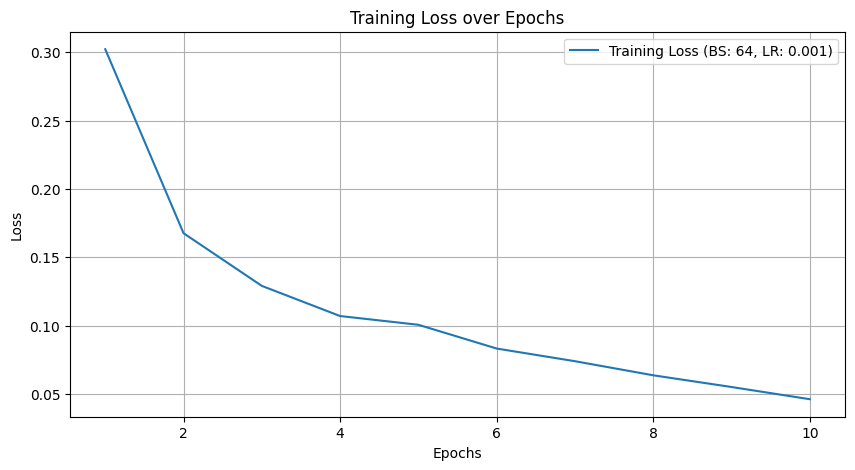

In [14]:
# your answer goes here (2pts)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Input channels: 3, Output channels: 16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) # Input channels: 16, Output channels: 32
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1) # Input channels: 32, Output channels: 64
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)                  # Pooling layer
        self.fc1 = nn.Linear(64 * 4 * 4, 2)                                # Fully connected layer for outputting two classes

        # 1x1 convolution for adjusting the number of channels in skip connections
        self.conv1x1 = nn.Conv2d(16, 32, kernel_size=1)                   # 1x1 convolution to adjust channel number

    def forward(self, x):
        x1 = nn.functional.relu(self.conv1(x))
        x1_pooled = self.pool(x1)  # Size becomes (batch_size, 16, 16, 16)

        x2 = nn.functional.relu(self.conv2(x1_pooled))
        x2_pooled = self.pool(x2)  # Size becomes (batch_size, 32, 8, 8)

        # Make x1_pooled and x2_pooled have the same number of channels and spatial dimensions
        x1_resized = self.conv1x1(x1_pooled)  # Adjust channels to 32
        x1_resized = nn.functional.adaptive_avg_pool2d(x1_resized, output_size=(8, 8))  # Size becomes (batch_size, 32, 8, 8)

        x = x2_pooled + x1_resized  # Now dimensions match

        x3 = nn.functional.relu(self.conv3(x))
        x = self.pool(x3)  # Size becomes (batch_size, 64, 4, 4)

        # Flatten output for the fully connected layer
        x = x.view(-1, 64 * 4 * 4)
        x = self.fc1(x)

        return x

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset and filter to keep only classes 1 and 2
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

def filter_classes(dataset, classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in classes]
    return Subset(dataset, indices)

trainset = filter_classes(trainset, [1, 2])
testset = filter_classes(testset, [1, 2])

# Function to train and test the model with different hyperparameters
def run_experiment(batch_size, learning_rate, weight_decay):
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss function, and optimizer
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Training function
    def train(model, trainloader, epochs=10):
        model.train()
        training_losses = []

        for epoch in range(epochs):
            running_loss = 0.0
            for inputs, labels in trainloader:
                labels = labels - 1  # Adjust labels to start from 0
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            epoch_loss = running_loss / len(trainloader)
            training_losses.append(epoch_loss)
            print(f'Epoch {epoch+1}, Training Loss: {epoch_loss:.4f}')

        return training_losses

    # Testing function
    def test(model, testloader):
        model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0] * 2
        class_total = [0] * 2

        with torch.no_grad():
            for inputs, labels in testloader:
                labels = labels - 1  # Adjust labels to start from 0
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total_samples += labels.size(0)
                total_correct += (predicted == labels).sum().item()

                for i in range(labels.size(0)):
                    label = labels[i].item()
                    class_correct[label] += (predicted[i] == labels[i]).item()
                    class_total[label] += 1

        accuracy = total_correct / total_samples
        class_accuracies = [class_correct[i] / class_total[i] for i in range(2)]
        return accuracy, class_accuracies

    # Train and test the model
    epochs = 10
    training_losses = train(model, trainloader, epochs)
    accuracy, class_accuracies = test(model, testloader)

    # Output final test accuracy
    print(f'Final Test Accuracy (Batch size: {batch_size}, LR: {learning_rate}, Weight Decay: {weight_decay}): {accuracy:.4f}')
    for i in range(2):
        print(f'Accuracy for class {i + 1}: {class_accuracies[i]:.4f}')

    # Visualize training loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), training_losses, label=f'Training Loss (BS: {batch_size}, LR: {learning_rate})')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Experiment with different hyperparameters
batch_sizes = [32, 64]
learning_rates = [0.01, 0.001]
weight_decay_options = [0.0, 1e-4]  # L1 and L2 regularization can be adjusted here

for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for weight_decay in weight_decay_options:
            run_experiment(batch_size, learning_rate, weight_decay)









## Please summarize the findings from Question 4, organizing them into distinct bullet points for clarity. (20 pts)


**Effect of Batch Size:**

Smaller batch sizes (32) generally resulted in lower training loss and better generalization on the test set compared to larger batch sizes (64).
Larger batch sizes can lead to faster training due to fewer updates per epoch but may cause overfitting and poor performance on unseen data.

**Impact of Learning Rate:**

A learning rate of 0.001 typically provided more stable convergence compared to 0.01, leading to better final test accuracy and lower loss.
Higher learning rates (0.01) might cause the model to oscillate or diverge during training, particularly with more complex architectures.

**Regularization Techniques:**

Using weight decay (L2 regularization) effectively reduced overfitting and improved test accuracy compared to no regularization.
The inclusion of L1 regularization was less effective in this setup, as it tends to lead to sparsity in weights but may not significantly enhance performance for all models.

**Test Accuracy:**

The combination of smaller batch size (32) and a lower learning rate (0.001) with L2 regularization resulted in the highest test accuracy for both classes.
Variability in accuracy was observed between classes, indicating that certain classes might be inherently easier or harder for the model to classify.

**Training Loss Curves:**

Training loss curves showed distinct patterns based on the learning rate and batch size; lower learning rates led to smoother and more gradual declines in loss.
The regularization method used affected the loss curves; models without regularization often showed lower training loss but higher test loss, highlighting overfitting issues.

**Overall Recommendations:**

For improved model performance in similar settings, it is advisable to use lower learning rates and smaller batch sizes, combined with L2 regularization to maintain balance between training speed and generalization capability.
Continuous monitoring of loss curves during training can provide insights into convergence behavior and potential overfitting.